## 4.1 리액트의 이벤트 시스템 
- 이벤트
    - 사용자가 웹 브라우저에서 DOM 요소들과 상호작용하는 것
- 주의사항
    - 이벤트 이름은 카멜 표기법으로 작성
    - 이벤트에 실행할 자바스크립트 코드를 전달하는 것이 아니라, 함수 형태의 값을 전달
    - DOM 요소에만 이벤트를 설정 가능
- 종류
    - Clipboard, Touch, Composition, UI, Keyboard
    - Wheel, Focus, Media, Form, Image
    - Mouse, Animation, Selection, Transition

# 4.2 예제로 이벤트 핸들링 익히기
- 컴포넌트 생성 및 불러오기 > onChange 이벤트 핸들링하기 > 임의 메서드 만들기 > input 여러 개 다루기 > onKeyPress 이벤트 핸들링하기

#### onChange 이벤트 설정 핸들링하기
- onchange 이벤트 설정
```js
import { Component} from 'react';

class EventPractice extends Component {
    render() {
        return (
            <div>
                <h1>이벤트 연습</h1>
                <input
                    type="text"
                    name="message"
                    placeholder='아무거나 입력해 보세요'
                    onChange={
                        (e) => {
                            console.log(e.target.value)
                        }
                    }
                />
            </div>
        )
    }
};

export default EventPractice;
```

- state에 input 값 담기, 버튼을 누를 때 comment 값을 공백으로 설정
```js
import { Component} from 'react';

class EventPractice extends Component {

    state = {
        message:''
    }

    render() {
        return (
            <div>
                <h1>이벤트 연습</h1>
                <input
                    type="text"
                    name="message"
                    placeholder='아무거나 입력해 보세요'
                    value={this.state.message}
                    onChange={
                        (e) => {
                            this.setState({
                                message:e.target.value
                            })
                        }
                    }
                />
                <button onClick={
                    ()=>{
                        alert(this.state.message)
                        this.setState({
                            message:''
                        })
                    }
                }>확인</button>
            </div>
        )
    }
};

export default EventPractice;
```
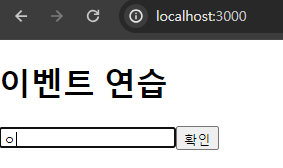
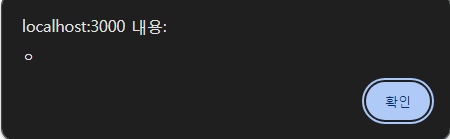


#### 임의 메서드 만들기
- 함수를 미리 준비하여 전달하는 방법
- 성능 차이는 거의 없지만, 가독성이 좋다
```js
import { Component} from 'react';

class EventPractice extends Component {

    state = {
        message:''
    }

    constructor(props){
        super(props)
        this.handleChange = this.handleChange.bind(this)
        this.handleClick = this.handleClick.bind(this)
    }

    handleChange = (e) => {
        this.setState({
            message:e.target.value
        })
    }

    handleClick() {
        alert(this.state.message)
        this.setState({
            message:''
        })
    }

    render() {
        return (
            <div>
                <h1>이벤트 연습</h1>
                <input
                    type="text"
                    name="message"
                    placeholder='아무거나 입력해 보세요'
                    value={this.state.message}
                    onChange={this.handleChange}
                />
                <button onClick={this.handleClick}>확인</button>
            </div>
        )
    }
};

export default EventPractice;
```

#### input 여러 개 다루기
- event 객체를 활용
```js
import { Component} from 'react';

class EventPractice extends Component {

    state = {
        username:'',
        message:''
    }

    constructor(props){
        super(props)
        this.handleChange = this.handleChange.bind(this)
        this.handleClick = this.handleClick.bind(this)
    }

    handleChange = (e) => {
        this.setState({
            [e.target.name]:e.target.value
        })
    }

    handleClick() {
        alert(this.state.username + ': ' + this.state.message)
        this.setState({
            username:"",
            message:''
        })
    }

    render() {
        return (
            <div>
                <h1>이벤트 연습</h1>
                <input
                    type="text"
                    name="username"
                    placeholder='아무거나 입력해 보세요'
                    value={this.state.username}
                    onChange={this.handleChange}
                />
                <input
                    type="text"
                    name="message"
                    placeholder='아무거나 입력해 보세요'
                    value={this.state.message}
                    onChange={this.handleChange}
                />
                <button onClick={this.handleClick}>확인</button>
            </div>
        )
    }
};

export default EventPractice;
```
- [e.target.name]:e.target.value
    - 객체 안에서 key를 [ ]로 감싸면 그 안에 넣은 레퍼런스가 가리키는 실제 값이 key 값으로 사용된다

#### onKeyPress 이벤트 핸들링
- 키를 눌렀을 때 발생하는 KeyPress 이벤트 처리
- 두 번째 텍스트 인풋에서 텍스트를 입력하고 enter를 누르면 이벤트 발생
```js
import { Component} from 'react';

class EventPractice extends Component {

    state = {
        username:'',
        message:''
    }

    constructor(props){
        super(props)
        this.handleChange = this.handleChange.bind(this)
        this.handleClick = this.handleClick.bind(this)
    }

    handleChange = (e) => {
        this.setState({
            [e.target.name]:e.target.value
        })
    }

    handleClick() {
        alert(this.state.username + ': ' + this.state.message)
        this.setState({
            username:"",
            message:''
        })
    }

    handleKeyPress = (e) => {
        if(e.key === 'Enter') {
            this.handleClick()
        }
    }

    render() {
        return (
            <div>
                <h1>이벤트 연습</h1>
                <input
                    type="text"
                    name="username"
                    placeholder='아무거나 입력해 보세요'
                    value={this.state.username}
                    onChange={this.handleChange}
                />
                <input
                    type="text"
                    name="message"
                    placeholder='아무거나 입력해 보세요'
                    value={this.state.message}
                    onChange={this.handleChange}
                    onKeyPress={this.handleKeyPress}
                />
                <button onClick={this.handleClick}>확인</button>
            </div>
        )
    }
};

export default EventPractice;
```

## 4.3 함수 컴포넌트로 구현해 보기
```js
import { useState } from 'react';

const EventPractice = () => {
  const [form, setForm] = useState({
    username: '',
    message: ''
  });
  const { username, message } = form;
  const onChange = e => {
    setTimeout(() => console.log(e), 500);
    const nextForm = {
      ...form, // 기존의 form 내용을 이 자리에 복사 한 뒤
      [e.target.name]: e.target.value // 원하는 값을 덮어씌우기
    };
    setForm(nextForm);
  };
  const onClick = () => {
    alert(username + ': ' + message);
    setForm({
      username: '',
      message: ''
    });
  };
  const onKeyPress = e => {
    if (e.key === 'Enter') {
      onClick();
    }
  };
  return (
    <div>
      <h1>이벤트 연습</h1>
      <input
        type="text"
        name="username"
        placeholder="유저명"
        value={username}
        onChange={onChange}
      />
      <input
        type="text"
        name="message"
        placeholder="아무거나 입력해보세요"
        value={message}
        onChange={onChange}
        onKeyPress={onKeyPress}
      />
      <button onClick={onClick}>확인</button>
    </div>
  );
};
export default EventPractice;
```

## 4.4 정리
- 클래스형 컴포넌트로도 구현해 보고 함수 컴포넌트로도 구현, 클래스형 컴포넌트로 할 수 있는 대부분의 작업은 함수 컴포넌트로도 구현 가능하다